In [20]:
# geopandas
# shp 파일 그리기 -> ex) 동작구 

# 1) 법정동 기준 그리기
# 2) 행정동 기준 그리기
import numpy as np
import pandas  as pd
import os

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon
import shapely.geometry as geometry
import pandas as pd
import seaborn as sns

# 1) 법정동기준
path = "C:/Users/urse/Downloads/EMD_201804/"
os.chdir(path)
file_name = 'TL_SCCO_EMD.shp'

SiGunGu  = gpd.read_file(path+file_name, engine='python', encoding='euc-kr')

# 시군구 지역번호 정수형으로 변환
SiGunGu['EMD_CD']=SiGunGu['EMD_CD'].astype(int)

# 동작구인것만 11590101, 11590110
DongJack=SiGunGu[SiGunGu['EMD_CD'].isin([i for i in range(11590101,11590110)])]

print(DongJack.shape)

(9, 4)


In [21]:
DongJack

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
409,11590101,Noryangjin-dong,노량진동,"POLYGON ((951386.621 1946611.519, 951396.786 1..."
410,11590102,Sangdo-dong,상도동,"MULTIPOLYGON (((951797.594 1945502.652, 951798..."
411,11590103,Sangdo 1(il)-dong,상도1동,"POLYGON ((951535.558 1945562.562, 951535.562 1..."
412,11590104,Bon-dong,본동,"POLYGON ((951414.806 1946601.185, 951415.040 1..."
413,11590105,Heukseok-dong,흑석동,"POLYGON ((952444.058 1946115.502, 952445.444 1..."
414,11590106,Dongjak-dong,동작동,"POLYGON ((953516.485 1945486.143, 953518.745 1..."
415,11590107,Sadang-dong,사당동,"POLYGON ((952523.047 1944081.142, 952577.144 1..."
416,11590108,Daebang-dong,대방동,"POLYGON ((949350.581 1946405.136, 949425.246 1..."
417,11590109,Sindaebang-dong,신대방동,"POLYGON ((949497.636 1944553.249, 949504.961 1..."


In [22]:
DongJack.dtypes

EMD_CD           int32
EMD_ENG_NM      object
EMD_KOR_NM      object
geometry      geometry
dtype: object

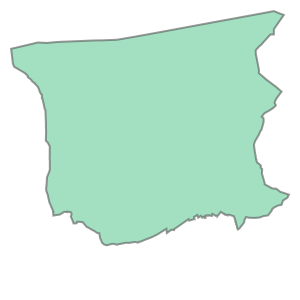

In [24]:
num=0
# 409 노량진, 410 상도동, 412 본동, 413 흑석동, 414 동작동
# 415 사당동, 416 대방동, 417 신대방동
# Noryangjin, Sangdo, Bon, Heukseok, Dongjak, Sadang, Daebang, Sindaebang

# idx 409, 410, 412, 413, 414, 415, 416, 417
# row -> EMD_CD EMD_ENG_NM, EMD_KOR_NM, geometry -> Series

for idx, row in DongJack.iterrows():
    if idx !=410: # 상도동이 아니고
        coords=list(row['geometry'].exterior.coords)
        if idx == 409: # 노량진동
            poly_Noryangjin = Polygon(coords)
        elif idx == 412: # 본동
            poly_Bon = Polygon(coords)
        elif idx == 413: # 흑석동
            poly_Heukseok = Polygon(coords)
        elif idx == 414: # 동작동
            poly_Dongjak = Polygon(coords)
        elif idx == 415: # 사당동
            poly_Sadang = Polygon(coords)
        elif idx == 416: # 대방동
            poly_Daebang = Polygon(coords)
        elif idx == 417: # 신대방동
            poly_Sindaebang = Polygon(coords)
        else : # 상도1동
            poly_Sangdo = Polygon(coords)

# 노량진동
poly_Noryangjin

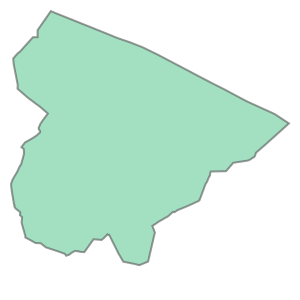

In [25]:
# 본동
poly_Bon

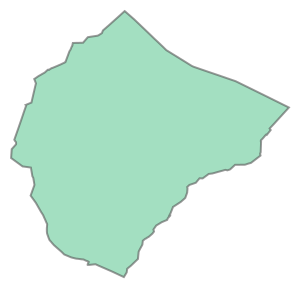

In [26]:
# 흑석동
poly_Heukseok

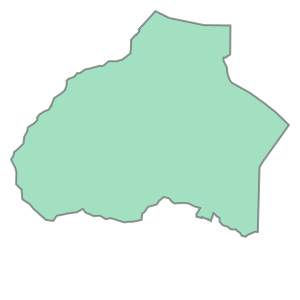

In [27]:
# 동작동
poly_Dongjak

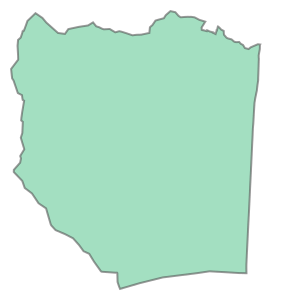

In [28]:
# 사당동
poly_Sadang

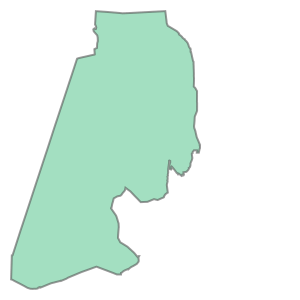

In [29]:
# 대방동
poly_Daebang

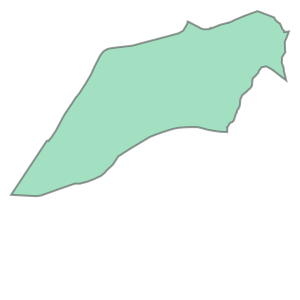

In [30]:
# 신대방동
poly_Sindaebang

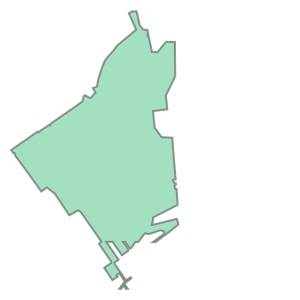

In [31]:
# 상도 1동
poly_Sangdo

In [34]:
# 2) 행정동 기준 좌표
path2 = "C:/Users/urse/Downloads/Z_SOP_BND_ADM_DONG_PG/"
os.chdir(path2)

file_name2 = 'Z_SOP_BND_ADM_DONG_PG.shp'

SiGunGu2  = gpd.read_file(path2 + file_name2, engine='python', encoding='euc-kr')

# 시군구 지역번호 정수형으로 변환
SiGunGu2['ADM_DR_CD']=SiGunGu2['ADM_DR_CD'].astype(int)

# 동작구 행정동코드 
# 동작구인것만 1120052 ~ 1120074
DongJack2=SiGunGu2[SiGunGu2['ADM_DR_CD'].isin([i for i in range(1120052,1120074)])]

print(DongJack2.shape)
DongJack2

(15, 4)


,BASE_YEAR,ADM_DR_CD,ADM_DR_NM,geometry
300,2018,1120052,노량진2동,"POLYGON ((194618.975 445110.356, 194630.445 44..."
301,2018,1120053,상도1동,"POLYGON ((195863.930 445455.531, 195868.797 44..."
302,2018,1120054,상도2동,"POLYGON ((195634.904 445322.062, 195611.379 44..."
303,2018,1120055,상도3동,"POLYGON ((194191.285 443734.915, 194190.937 44..."
304,2018,1120056,상도4동,"POLYGON ((194373.007 444867.280, 194376.300 44..."
305,2018,1120063,사당1동,"POLYGON ((198415.200 442792.378, 198414.937 44..."
306,2018,1120065,사당3동,"POLYGON ((196774.319 443887.211, 196805.043 44..."
307,2018,1120066,사당4동,"POLYGON ((197751.747 442649.832, 197777.271 44..."
308,2018,1120067,사당5동,"POLYGON ((196659.776 443855.861, 196681.335 44..."
309,2018,1120068,대방동,"POLYGON ((194022.417 446234.916, 194024.694 44..."


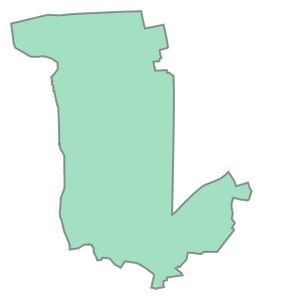

In [36]:
# 300 노량진 2동 / 301 상도1동 / 302 상도2동 / 303 상도3동 / 304 상도4동 
# 305 사당1동 306 사당3동 / 307 사당4동 / 308 사당 5동 / 309 대방동 
# 310 신대방1동 / 311 신대방2동 / 312 흑석동 / 313 노량진 1동 / 314 사당2동

# Noryangjin, Sangdo, Bon, Heukseok, Dongjak, Sadang, Daebang, Sindaebang

# idx 409, 410, 412, 413, 414, 415, 416, 417
# row -> EMD_CD EMD_ENG_NM, EMD_KOR_NM, geometry -> Series

for idx2, row2 in DongJack2.iterrows():
    coords=list(row2['geometry'].exterior.coords)
    if idx2 == 300: # 노량진 2동
        poly_Noryangjin_2 = Polygon(coords)
    elif idx2 == 301: # 상도 1동
        poly_Sangdo_1 = Polygon(coords)
    elif idx2 == 302: # 상도 2동
        poly_Sangdo_2 = Polygon(coords)
    elif idx2 == 303: # 상도 3동
        poly_Sangdo_3 = Polygon(coords)
    elif idx2 == 304: # 상도 4동
        poly_Sangdo_4 = Polygon(coords)
    elif idx2 == 305: # 사당 1동
        poly_Sadang_1 = Polygon(coords)
    elif idx2 == 306: # 사당 3동
        poly_Sadang_3 = Polygon(coords)
    elif idx2 == 307: # 사당 4동
        poly_Sadang_4 = Polygon(coords)
    elif idx2 == 308: # 사당 5동
        poly_Sadang_5 = Polygon(coords)
    elif idx2 == 309: # 대방동
        poly_Daebang = Polygon(coords)
    elif idx2 == 310: # 신대방 1동
        poly_Sindaebang_1 = Polygon(coords)
    elif idx2 == 311: # 신대방 2동
        poly_Sindaebang_2 = Polygon(coords)
    elif idx2 == 312: # 흑석동
        poly_Heukseok = Polygon(coords)
    elif idx2 == 313: # 노량진 1동
        poly_Noryangjin_1 = Polygon(coords)
    elif idx2 == 314: # 사당 2동
        poly_Sadang_2 = Polygon(coords)

# 노량진 2동
poly_Noryangjin_2


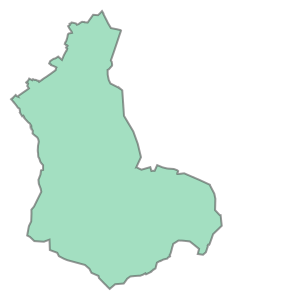

In [37]:
# 상도 1동
poly_Sangdo_1

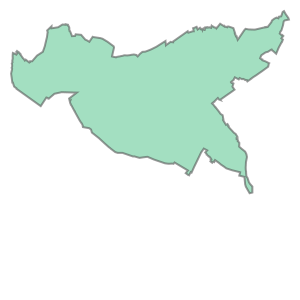

In [38]:
# 상도 2동
poly_Sangdo_2

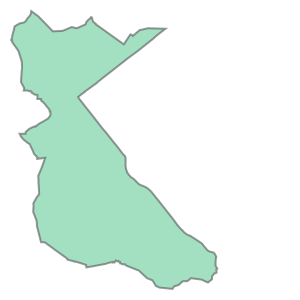

In [39]:
# 상도 3동
poly_Sangdo_3

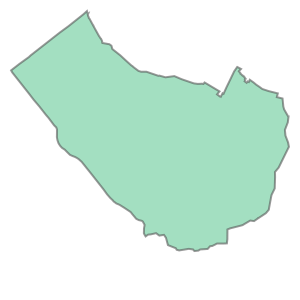

In [40]:
# 상도 4동
poly_Sangdo_4

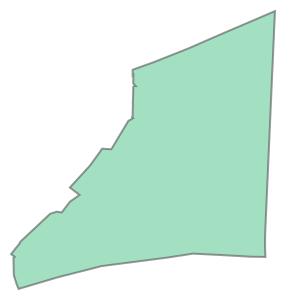

In [41]:
# 사당 1동
poly_Sadang_1

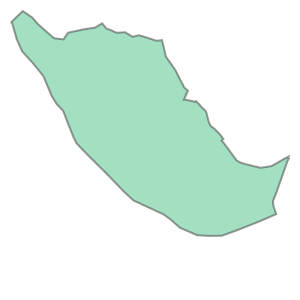

In [42]:
# 사당 3동
poly_Sadang_3

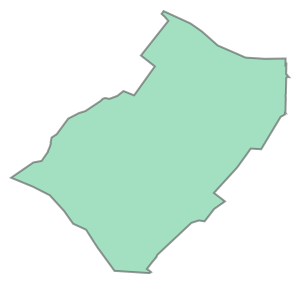

In [43]:
# 사당 4동
poly_Sadang_4

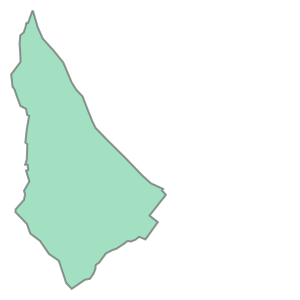

In [44]:
# 사당 5동
poly_Sadang_5

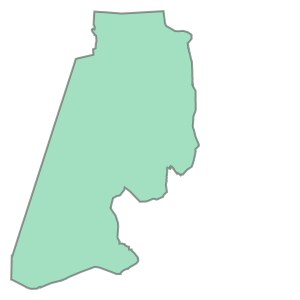

In [45]:
# 대방동
poly_Daebang

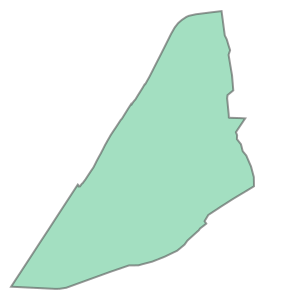

In [46]:
# 신대방 1동
poly_Sindaebang_1

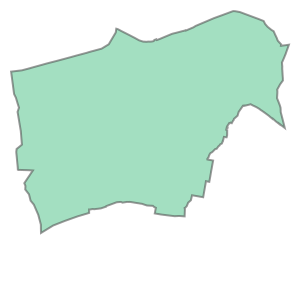

In [47]:
# 신대방 2동
poly_Sindaebang_2

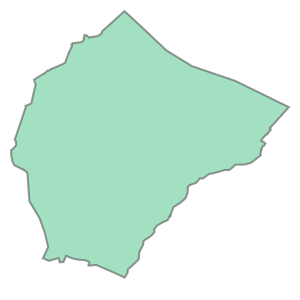

In [48]:
# 흑석동
poly_Heukseok

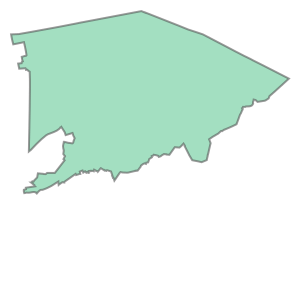

In [49]:
# 노량진 1동
poly_Noryangjin_1

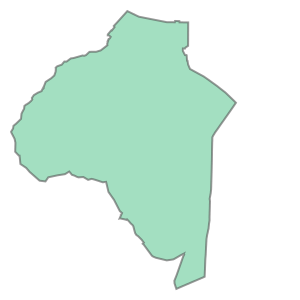

In [50]:
# 사당 2동
poly_Sadang_2